In [1]:
import numpy as np
import cantera as ct
import matplotlib
import matplotlib.pyplot as plt

### Flame Temperature considering all species

In [2]:
P=[1e5,1e6,1e7,1e13]
T0=300
gasTad = []
for i in P:
    gas=ct.Solution('gri30.yaml')
    gas.TPX = T0, i,'CH4:1,O2:2'
    gas.equilibrate('HP')
    gasTad.append(gas.T)

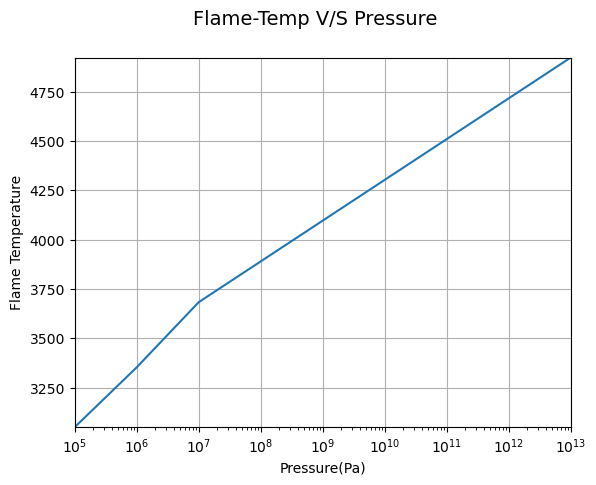

In [7]:
fig=plt.figure(1) 
fig.suptitle('Flame-Temp V/S Pressure', fontsize=14)
plt.semilogx(P, gasTad,label='considering all species')
plt.grid()
plt.ylabel('Flame Temperature')
plt.xlabel('Pressure(Pa)') 
plt.xlim(P[0],P[-1])
plt.ylim(gasTad[0],gasTad[-1])
plt.show()

### Flame Temperature with specified number of species

In [8]:
gas1Tad = []
for i in P:
    gas1=ct.Solution('gri30.yaml')
    ich4 = gas1.species_index('CH4')
    io2 = gas1.species_index('O2')
    ico = gas1.species_index('CO')
    ih2o=gas1.species_index('H2O')
    ico2=gas1.species_index('CO2')
    spec = ct.Species.list_from_file('gri30.yaml')
    gas1 = ct.Solution(thermo='ideal-gas', species=[spec[i] for i in (ich4,io2,ico,ih2o,ico2)])
    gas1.TPX = T0, i,'CH4:1,O2:2'
    gas1.equilibrate('HP')
    gas1Tad.append(gas1.T)

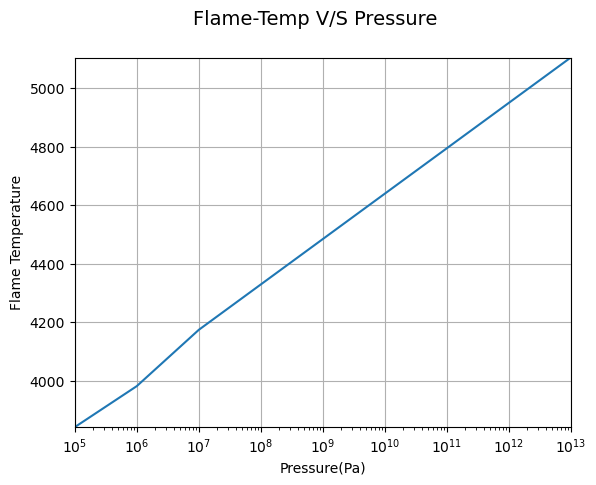

In [9]:
fig=plt.figure(2) 
fig.suptitle('Flame-Temp V/S Pressure', fontsize=14)
plt.semilogx(P, gas1Tad,label='considering a set of species')
plt.grid()
plt.xlim(P[0],P[-1])
plt.ylim(gas1Tad[0],gas1Tad[-1])
plt.ylabel('Flame Temperature')
plt.xlabel('Pressure(Pa)') 
plt.show()

***

In [6]:
T=np.linspace(300,5000,200)
#T = np.array([3000,3200,3400,3600,3800,4000],'d')
P=np.array([1e5,1e6,1e7,1e13],'d')
h=np.zeros([P.size,T.size])

combustible = 'CH4'
ifuel = gas.species_index(combustible)
io2 = gas.species_index('O2')

richesse=2/2
stoich_O2 = gas.n_atoms(combustible,'C') + 0.25*gas.n_atoms(combustible,'H')

X = np.zeros(gas.n_species)
X[ifuel]=richesse
X[io2]=stoich_O2


In [7]:
for i in range (P.size):
    for j in range (T.size):
        gas.TPX = T[j], P[i], X
        gas.equilibrate('TP')
        h[i,j]=gas.h

==Plot of specific enthalpy of burnt gases with reference to the fresh gas at 300K, 1atm.==

Reference specific enthalpy of fresh gas is:-929856.2500650212


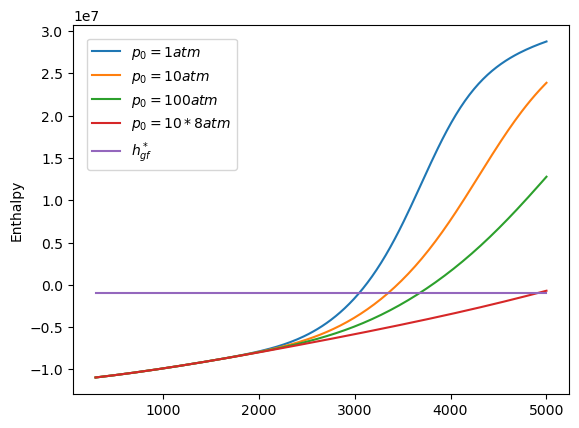

In [8]:
gas.TPX = 300, 1e5, X
hgfref=gas.h
print ('''Reference specific enthalpy of fresh gas is:{0}'''.format(hgfref))
hf=np.ones(T.size)*hgfref
plt.plot(T, h[0,:],label='$p_0=1atm$')
plt.plot(T, h[1,:],label='$p_0=10atm$')
plt.plot(T, h[2,:],label='$p_0=100atm$')
plt.plot(T, h[3,:],label='$p_0=10*8atm$')

plt.plot(T, hf,label='$h^*_{gf}$')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=1.)

plt.ylabel('Enthalpy')
plt.show()

***

**Calculating the heat of reaction for all temperatures and pressures, while plotting the same.**

In [12]:
hfr = np.zeros([P.size,T.size])
hr = np.zeros([P.size,T.size])
for i in range(P.size):
    for j in range(T.size):
        gas.TPX = T[j],P[i],X
        hfr[i,j] = gas.h
        
for i in range(P.size):
        for j in range(T.size):
              hr[i,j] =  h[i,j] - hfr[i,j] 

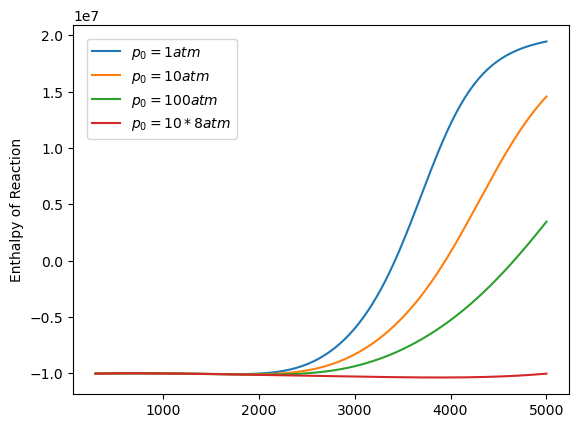

In [13]:
#print ('''enthalpy of reaction of gas is:{0}'''.format(hgfref))
plt.plot(T, hr[0,:],label='$p_0=1atm$')
plt.plot(T, hr[1,:],label='$p_0=10atm$')
plt.plot(T, hr[2,:],label='$p_0=100atm$')
plt.plot(T, hr[3,:],label='$p_0=10*8atm$')

plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=1.)

plt.ylabel('Enthalpy of Reaction')
plt.show()

***

For p0 = 1 atm, the term in enthalpy corresponding to the contribution of dissociation

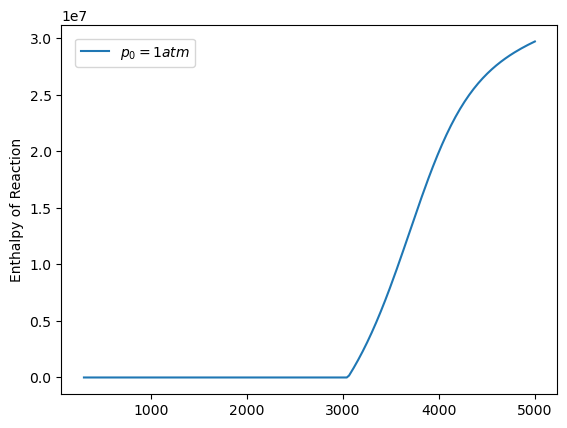

In [50]:
hd = np.zeros(T.size)
for i in range(T.size):
    if(h[0,i] -  hgfref > 0):
        hd[i] = h[0,i] -  hgfref
    else:
        continue
plt.plot(T, hd[:],label='$p_0=1atm$')
#plt.plot(T, hfr[0,:],label='$H_fg @ T_0$')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=1.)

plt.ylabel('Enthalpy of Reaction')
plt.show()

***

## for T = 3400 K, plot the molar fraction of the OH radical XOH(%) as a function of P

In [47]:
poh = []
xoh = np.zeros(20)
for i in range(20):
        gas.TPX = 3400,1e5 * 10 ** i,X
        gas.equilibrate('TP')
        ioh = gas.species_index('OH')
        xoh[i] = gas.X[ioh]
        poh.append(1e5*10**i)

In [48]:
xoh

array([1.29356216e-01, 1.01192720e-01, 5.87990552e-02, 3.02696088e-02,
       1.47250250e-02, 6.94747533e-03, 3.18431369e-03, 1.36969431e-03,
       5.25054859e-04, 2.23935585e-04, 1.18001773e-04, 6.35736362e-05,
       3.25105447e-05, 1.48731853e-05, 5.91584862e-06, 2.10531494e-06,
       7.03701097e-07, 2.28658913e-07, 7.35116118e-08, 2.35560716e-08])

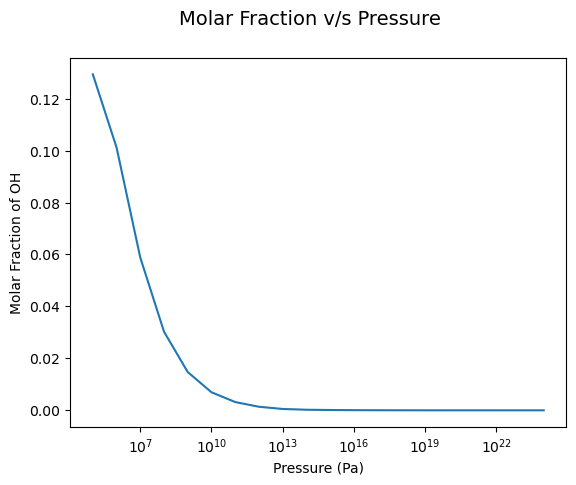

In [49]:
fig=plt.figure(4) 
fig.suptitle('Molar Fraction v/s Pressure', fontsize=14)
plt.semilogx(poh, xoh,label='$T=3400.0K$')
plt.ylabel('Molar Fraction of OH')
plt.xlabel('Pressure (Pa)') 
plt.show()